In [1]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [2]:
len(messages)

5574

In [3]:
for messno, msg in enumerate(messages[:20]):
    print(messno, msg)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [4]:
# Organize messages into dataframes using pandas

In [5]:
import pandas as pd

messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names = ['label', 'message'])

messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
# add a new feature called length that stores length of the message

In [9]:
messages['length'] = messages['message'].apply(len)

messages.head(6)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147


In [10]:
# plot distribution of message length

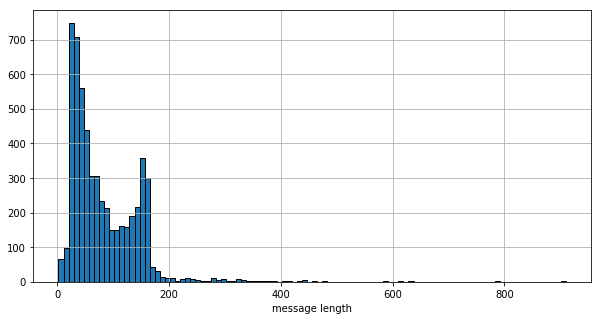

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.xlabel('message length')
messages['length'].hist(bins=100, edgecolor='black', figsize=(10,5))
plt.savefig('output/Histogram1.png')

In [12]:
# plot separate histograms for spam and ham to analyze the difference in distribution

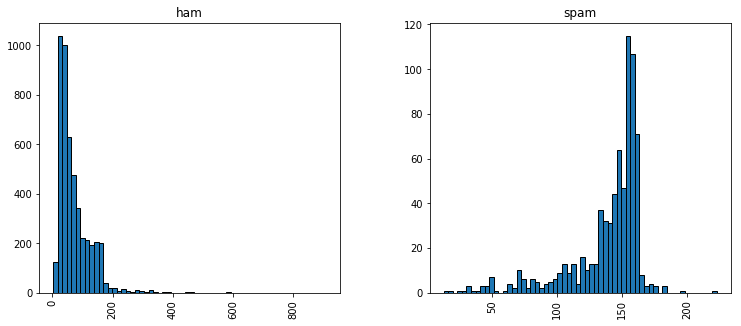

In [13]:
messages.hist(column='length',by='label',bins=60,figsize=(12,5),
              edgecolor='black')
plt.savefig('output/Histogram2.png')

In [14]:
# text pre-processing

In [17]:
# File:        text_preprocess.py
#
# Author:      Rohan Patel
#
# Date:        05/09/2018
#
# Description: This script loads the sms spam data, organizes the data into a pandas dataframe, and applies
#              some basic text pre-processing techniques like stopword removal and punctuation removal. Finally,
#              the processed dataframe is copied into a new csv file processed_msgs.csv

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

def loadData():
    
    messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names = ['label', 'message'])
    messages['length'] = messages['message'].apply(len)
    
    return messages

def text_process(data):
    '''
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    '''
    
    nopunc = [c for c in data if c not in string.punctuation] #remove punctuations
    nopunc = ''.join(nopunc)
    
    #nltk.download('stopwords')
    clean_msgs = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] # remove stopwords
    
    return clean_msgs

def main():
    
    messages = loadData()
    #print(messages)
    messages['message'] = messages['message'].apply(text_process)
    
    print('\n######################## Processed Messages #########################\n')
    print(messages)
    messages.to_csv('output/processed_msgs.csv', encoding='utf-8', index=False) #copy processed messages dataframe to a new csv file

if __name__ == "__main__":
    main()


######################## Processed Messages #########################

     label                                            message  length
0      ham  [Go, jurong, point, crazy, Available, bugis, n...     111
1      ham                     [Ok, lar, Joking, wif, u, oni]      29
2     spam  [Free, entry, 2, wkly, comp, win, FA, Cup, fin...     155
3      ham      [U, dun, say, early, hor, U, c, already, say]      49
4      ham  [Nah, dont, think, goes, usf, lives, around, t...      61
5     spam  [FreeMsg, Hey, darling, 3, weeks, word, back, ...     147
6      ham  [Even, brother, like, speak, treat, like, aids...      77
7      ham  [per, request, Melle, Melle, Oru, Minnaminungi...     160
8     spam  [WINNER, valued, network, customer, selected, ...     157
9     spam  [mobile, 11, months, U, R, entitled, Update, l...     154
10     ham  [Im, gonna, home, soon, dont, want, talk, stuf...     109
11    spam  [SIX, chances, win, CASH, 100, 20000, pounds, ...     136
12    spam  [URGEN